In [1]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
#### 1. EDA - Null Analysis / Outlier Analysis / Dropping of Column
#### 2. Univariate . Multivariate Analysis
#### 3. Feature Engineerring - Dimensionality Reduction, One Hot Encoding , Scaling
#### 4. testing Assumptions of Linear regression
#### 5. Building a model on train data set
#### 6. Validating the model on test data set
#### 7. Check for accuracy of the model, retrain / adjust if not up to the mark


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#### 1. EDA - Null Analysis / Outlier Analysis / Dropping of Column

In [8]:
## There are 37 columns. Based on our best judgement of domain, let us drop following columns which do not add much value for analysis.
## "Prospect ID", "Lead Number", "How did you hear about X Education", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement"
## "Lead Quality", "Lead Profile", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score", "Last Notable Activity" 
df_dropped_initial = df.drop(["Prospect ID", "Lead Number", "How did you hear about X Education", "Search", "Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Lead Quality", "Lead Profile", "Asymmetrique Activity Index", "Asymmetrique Profile Index", "Asymmetrique Activity Score", "Asymmetrique Profile Score", "Last Notable Activity"], axis=1)
df_dropped_initial.shape

(9240, 21)

In [9]:
df_dropped_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

In [10]:
## We see that many columns have large number of null values. Let us drop columns which have high number of nulls.
percent_null = df_dropped_initial.isnull().sum() * 100 / len(df_dropped_initial)
print(percent_null)

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Tags                                             36.287879
Update me on Supply Chain Content                 0.0000

In [11]:
## We will drop the columns which have more than 10% null values
## Columns to drop: "Country", "Specialization", "What is your current occupation", "What matters most to you in choosing a course", "Tags", "City"
df_dropped_second = df_dropped_initial.drop(["Country", "Specialization", "What is your current occupation", "What matters most to you in choosing a course", "Tags", "City"], axis=1)
df_dropped_second.shape

(9240, 15)

In [12]:
df_dropped_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9204 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9137 non-null   object 
 9   Through Recommendations                   9240 non-null   object 
 10  Receive More Updates About Our Cours

In [13]:
## For remaining columns with null values, we will replace the mean or median.
## Following are categorical variables, so, let us use mode for them.
## "Lead Source", "Last Activity"
df_dropped_second["Lead Source"].mode()

0    Google
Name: Lead Source, dtype: object

In [14]:
df_dropped_second["Last Activity"].mode()

0    Email Opened
Name: Last Activity, dtype: object

In [15]:
## Following are numeric variables, so, let us use median for them.
## "TotalVisits", "Page Views Per Visit"
df_dropped_second["TotalVisits"].mode()

0    0.0
Name: TotalVisits, dtype: float64

In [16]:
df_dropped_second["Page Views Per Visit"].mode()

0    0.0
Name: Page Views Per Visit, dtype: float64

In [17]:
## "Lead Source", "Last Activity"
df_dropped_second["Lead Source"] = df_dropped_second["Lead Source"].fillna(df_dropped_second["Lead Source"].mode()[0])

In [18]:
df_dropped_second["Last Activity"] = df_dropped_second["Last Activity"].fillna(df_dropped_second["Last Activity"].mode()[0])

In [19]:
## "TotalVisits", "Page Views Per Visit"
df_dropped_second["TotalVisits"] = df_dropped_second["TotalVisits"].fillna(df_dropped_second["TotalVisits"].median())
df_dropped_second["Page Views Per Visit"] = df_dropped_second["Page Views Per Visit"].fillna(df_dropped_second["Page Views Per Visit"].median())

In [20]:
df_dropped_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   int64  
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Through Recommendations                   9240 non-null   object 
 10  Receive More Updates About Our Cours

In [21]:
## We need to convert the object columns into numerical.
## Let us inspect the unique set of values for each of these columns.
categorical_cols = ['Lead Origin','Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']
unique_per_col = {col: df_dropped_second[col].unique().tolist() for col in categorical_cols}
print(unique_per_col)

{'Lead Origin': ['API', 'Landing Page Submission', 'Lead Add Form', 'Lead Import', 'Quick Add Form'], 'Lead Source': ['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google', 'Referral Sites', 'Welingak Website', 'Reference', 'google', 'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Do Not Email': ['No', 'Yes'], 'Do Not Call': ['No', 'Yes'], 'Last Activity': ['Page Visited on Website', 'Email Opened', 'Unreachable', 'Converted to Lead', 'Olark Chat Conversation', 'Email Bounced', 'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed', 'Had a Phone Conversation', 'View in browser link Clicked', 'Approached upfront', 'SMS Sent', 'Visited Booth in Tradeshow', 'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Through Recommendations': ['No', 'Yes'], 'Receive More Updates About Our Courses': ['No'], 'Update me on Supply Chain Con

In [22]:
## Some of the columns have a single value : No
## 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'
## Let us get rid of these columns
df_dropped_third = df_dropped_second.drop(["Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"], axis=1)
df_dropped_third.shape

(9240, 11)

In [23]:
## Let us see how much value counts the columns "Through Recommendations", "A free copy of Mastering The Interview","Do Not Email", "Do Not Call" have
df_dropped_third[["Through Recommendations", "A free copy of Mastering The Interview","Do Not Email", "Do Not Call"]].apply(pd.Series.value_counts)

,Through Recommendations,A free copy of Mastering The Interview,Do Not Email,Do Not Call
No,9233,6352,8506,9238
Yes,7,2888,734,2


In [24]:
## Let us keep these columns and apply One Hot Encoding.
## Treat positive Yes as 1 ad No as 0
df_dropped_third['Is Through Recommendations'] = df_dropped_third['Through Recommendations'].map({'Yes': 1, 'No': 0})
df_dropped_third['Free Copy of Mastering The Interview'] = df_dropped_third['A free copy of Mastering The Interview'].map({'Yes': 1, 'No': 0})
df_dropped_fourth = df_dropped_third.drop(["Through Recommendations", "A free copy of Mastering The Interview"], axis=1)


In [25]:
df_dropped_fourth['Email'] = df_dropped_fourth['Do Not Email'].map({'Yes': 0, 'No': 1})
df_dropped_fourth['Call'] = df_dropped_fourth['Do Not Call'].map({'Yes': 0, 'No': 1})
df_dropped_fifth = df_dropped_fourth.drop(["Do Not Email", "Do Not Call"], axis=1)

In [26]:
df_dropped_fifth.head

<bound method NDFrame.head of                   Lead Origin     Lead Source  Converted  TotalVisits  \
0                         API      Olark Chat          0          0.0   
1                         API  Organic Search          0          5.0   
2     Landing Page Submission  Direct Traffic          1          2.0   
3     Landing Page Submission  Direct Traffic          0          1.0   
4     Landing Page Submission          Google          1          2.0   
...                       ...             ...        ...          ...   
9235  Landing Page Submission  Direct Traffic          1          8.0   
9236  Landing Page Submission  Direct Traffic          0          2.0   
9237  Landing Page Submission  Direct Traffic          0          2.0   
9238  Landing Page Submission          Google          1          3.0   
9239  Landing Page Submission  Direct Traffic          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  \
0                               0 

In [27]:
df_dropped_fifth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Lead Origin                           9240 non-null   object 
 1   Lead Source                           9240 non-null   object 
 2   Converted                             9240 non-null   int64  
 3   TotalVisits                           9240 non-null   float64
 4   Total Time Spent on Website           9240 non-null   int64  
 5   Page Views Per Visit                  9240 non-null   float64
 6   Last Activity                         9240 non-null   object 
 7   Is Through Recommendations            9240 non-null   int64  
 8   Free Copy of Mastering The Interview  9240 non-null   int64  
 9   Email                                 9240 non-null   int64  
 10  Call                                  9240 non-null   int64  
dtypes: float64(2), in

In [28]:
## Let us see how much value counts the columns "Lead Origin", "Lead Source","Last Activity" have
df_dropped_fifth[["Lead Origin"]].apply(pd.Series.value_counts)

,Lead Origin
Lead Origin,
Landing Page Submission,4886
API,3580
Lead Add Form,718
Lead Import,55
Quick Add Form,1


In [29]:
df_dropped_fifth[["Lead Source"]].apply(pd.Series.value_counts)

,Lead Source
Lead Source,
Google,2904
Direct Traffic,2543
Olark Chat,1755
Organic Search,1154
Reference,534
Welingak Website,142
Referral Sites,125
Facebook,55
bing,6


In [30]:
df_dropped_fifth[["Last Activity"]].apply(pd.Series.value_counts)

,Last Activity
Last Activity,
Email Opened,3540
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,93


In [31]:
## How do we encode these categorical variables?
## May be we should see the correlation of target variable with these categories.

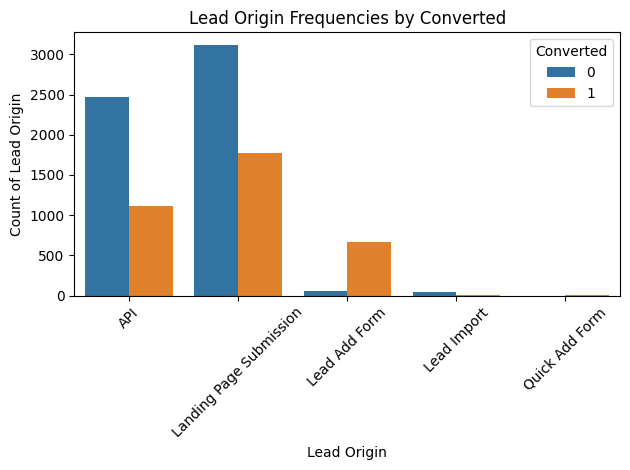

In [32]:
## Plot the count plot for each of the category with target variable as hue?
sns.countplot(data=df_dropped_fifth, x='Lead Origin', hue='Converted')
plt.xlabel('Lead Origin')
plt.ylabel('Count of Lead Origin')
plt.title('Lead Origin Frequencies by Converted')
plt.legend(title='Converted', labels=['0', '1'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

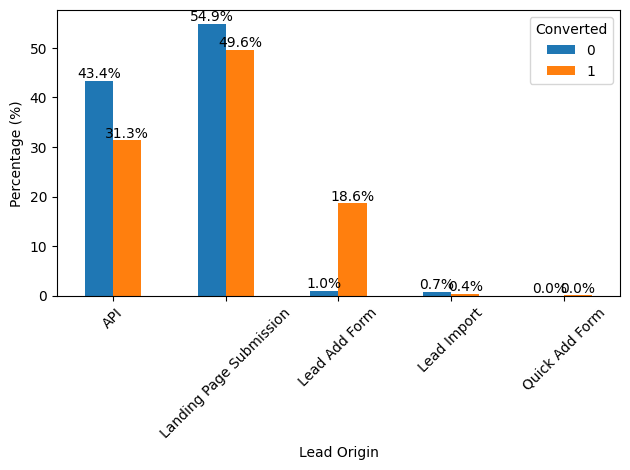

In [33]:
## Let us see the percentage distribution of Lead Origin
crosstab_norm = pd.crosstab(df_dropped_fifth['Lead Origin'], df['Converted'], normalize='columns') * 100
ax = crosstab_norm.plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%.1f%%')  # First container (target=0)
ax.bar_label(ax.containers[1], fmt='%.1f%%')  # Second container (target=1)
ax.set_ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
## Insight 1: Out of total converted leads:
## 49.6 % - Landing Page Submission
## 31.3 % - API
## 18.6 % - Lead Add Form

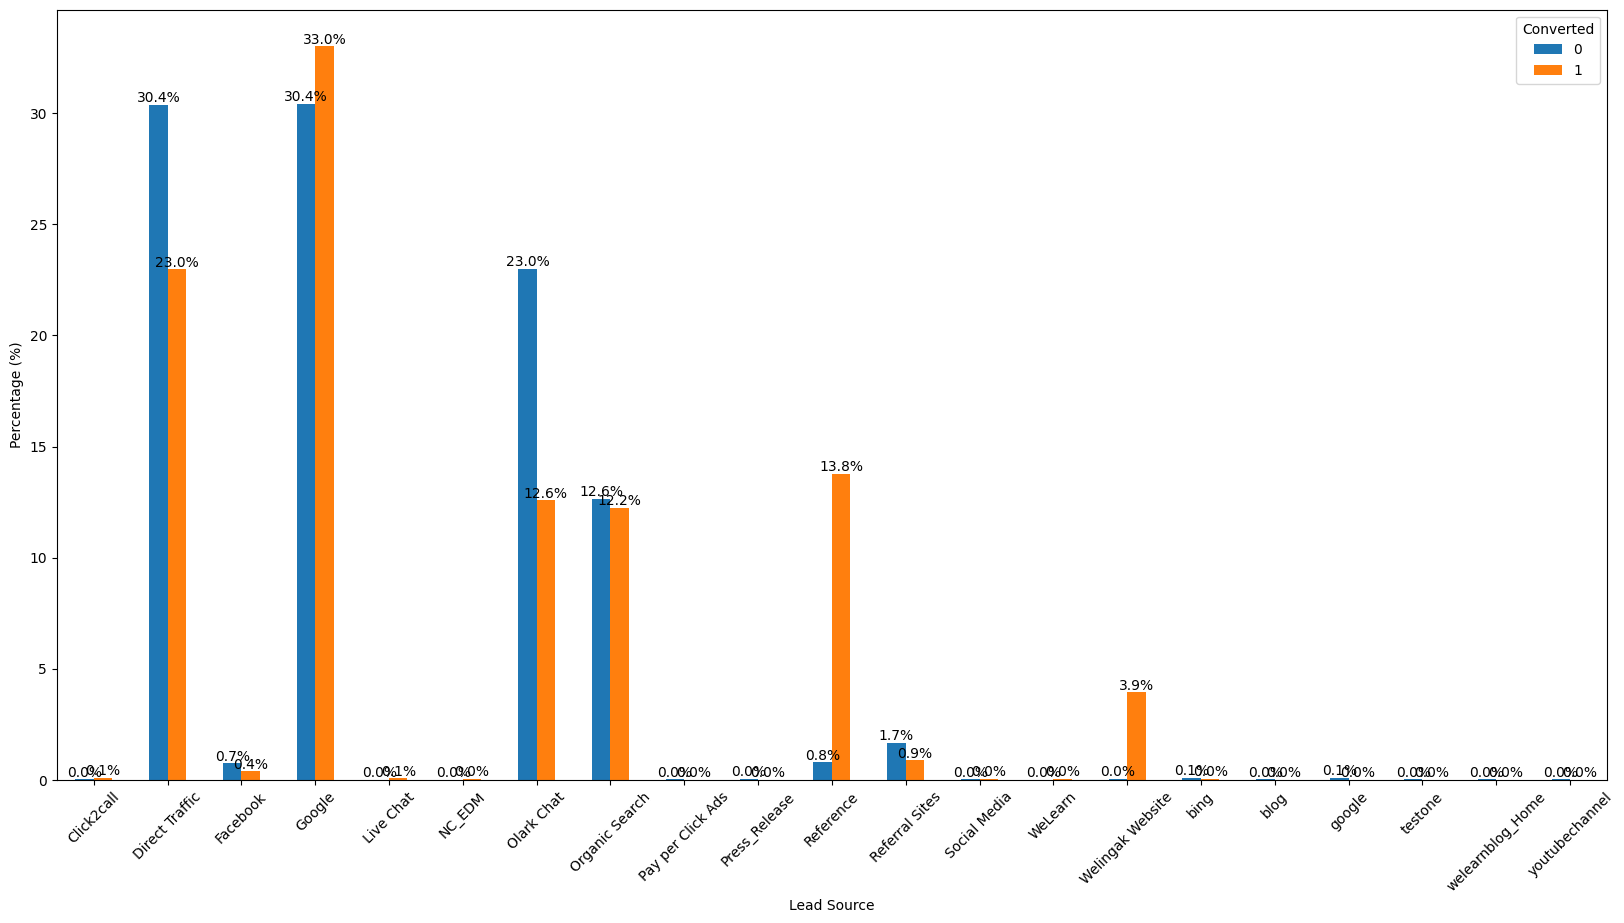

In [35]:
## Let us see the percentage distribution of Lead Source
crosstab_norm1 = pd.crosstab(df_dropped_fifth['Lead Source'], df['Converted'], normalize='columns') * 100
ax1 = crosstab_norm1.plot(kind='bar', figsize=(20, 10))
ax1.bar_label(ax1.containers[0], fmt='%.1f%%')  # First container (target=0)
ax1.bar_label(ax1.containers[1], fmt='%.1f%%')  # Second container (target=1)
ax1.set_ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [36]:
## Insight 2: Google, Reference and Welingak Website based leads have high chances of conversion.
## Organic search based leads have 50% chances of conversion.
## Though Direct traffic is high, the conversion rate is just 23% compared to all conversions. Same goes for Olark CHat.
## Some measures are needed to improve Olark Chat and Direct Traffic based leads.

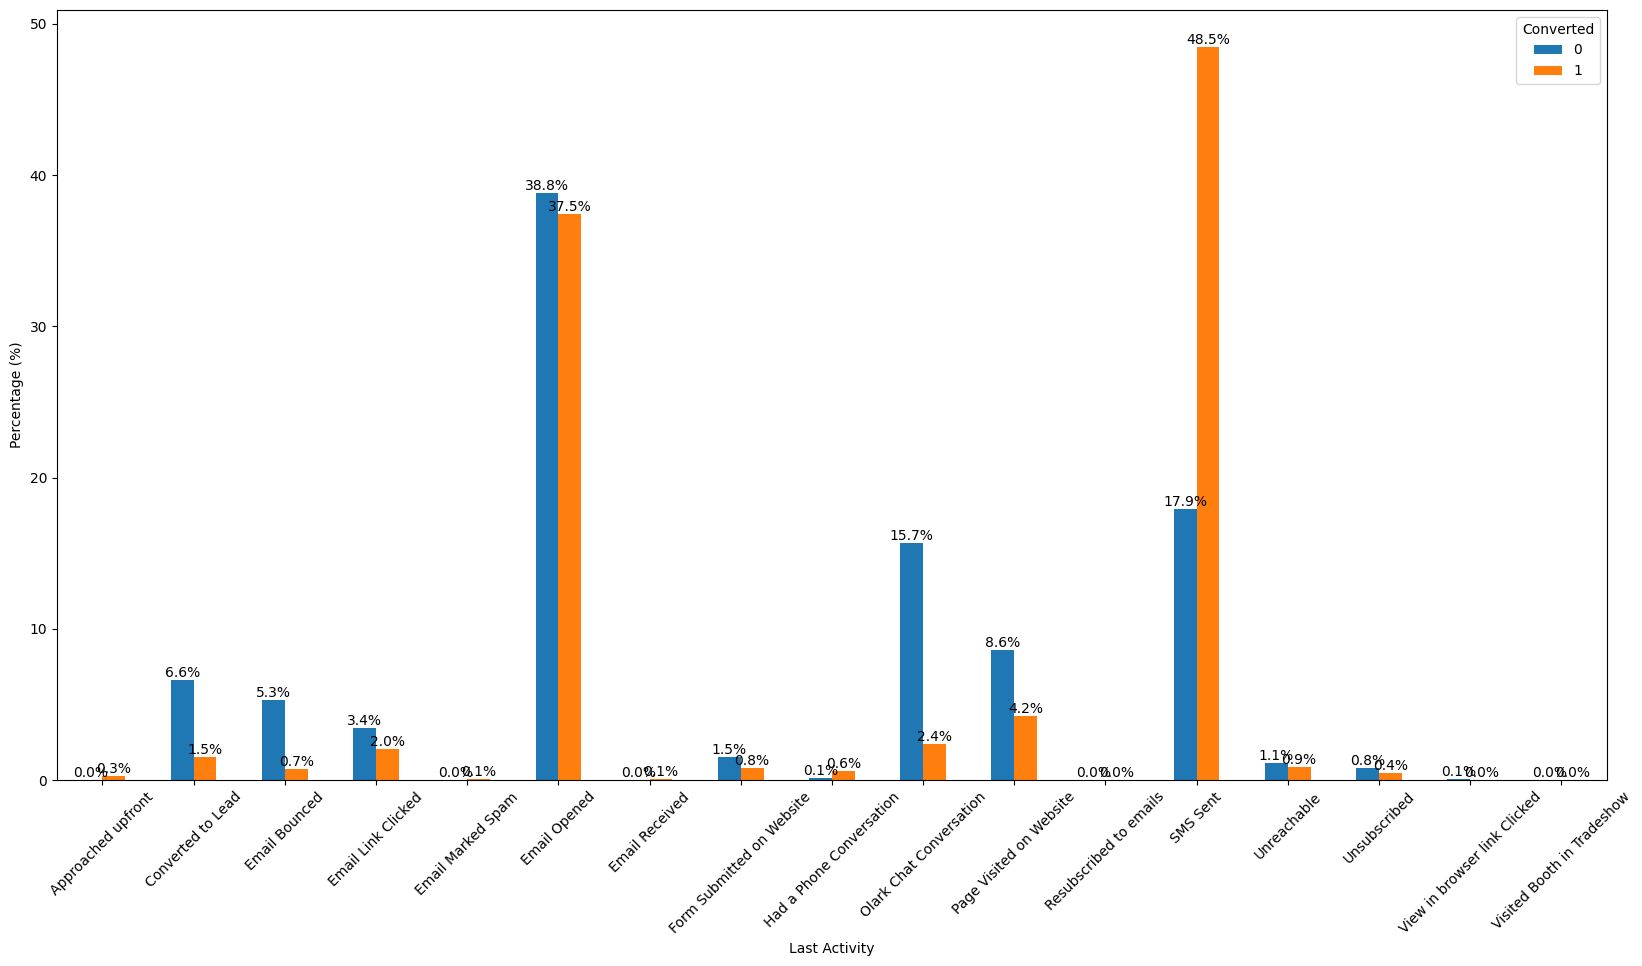

In [37]:
## Let us see the percentage distribution of Last Activity
crosstab_norm2 = pd.crosstab(df_dropped_fifth['Last Activity'], df['Converted'], normalize='columns') * 100
ax2 = crosstab_norm2.plot(kind='bar', figsize=(20, 10))
ax2.bar_label(ax2.containers[0], fmt='%.1f%%')  # First container (target=0)
ax2.bar_label(ax2.containers[1], fmt='%.1f%%')  # Second container (target=1)
ax2.set_ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.show()

In [38]:
## Insight 3: SMS Sent or Email Opened activities lead to high conversion possibilities.
## Again, Olark Chat and Page Visited On Website need some improvements to get higher conversions.

In [39]:
## Still the same question. How do we encode these categorical variables?

In [40]:
## Let us see if Chi square method can help us to get the ranks.
from sklearn.feature_selection import chi2, SelectKBest

In [41]:
# Encode categoricals (label/one-hot)
## categorical_features = ['Lead Origin', 'Lead Source', 'Last Activity']
X_cat_features = pd.get_dummies(df_dropped_fifth["Lead Origin"])
y = df_dropped_fifth['Converted']

# Chi-Square scores
chi_scores, p_values = chi2(X_cat_features, y)
feature_rank = pd.DataFrame({
    'feature': X_cat_features.columns,
    'chi2': chi_scores,
    'p_value': p_values
}).sort_values('chi2', ascending=True)

print(feature_rank.head(20))

                   feature        chi2        p_value
4           Quick Add Form    1.594777   2.066450e-01
3              Lead Import    5.156876   2.315450e-02
1  Landing Page Submission   11.429976   7.226863e-04
0                      API   82.624322   9.922853e-20
2            Lead Add Form  881.959830  8.195601e-194


In [42]:
feature_rank.shape

(5, 3)

In [43]:
## Lead Origin Weight : Above stats also confirm that amongst Lead Origin, following is the order as per influence on target:
## Lead Origin                   Lead Origin Weight
## "Lead Add Form"               5
## "API"                         4
## "Landing Page Submission"     3
## "Lead Import"                 2
## Quick Add Form                1

In [44]:
# Encode categoricals (label/one-hot)
## categorical_features = ['Lead Origin', 'Lead Source', 'Last Activity']
X_cat_features1 = pd.get_dummies(df_dropped_fifth["Lead Source"])

# Chi-Square scores
chi_scores1, p_values1 = chi2(X_cat_features1, y)
feature_rank1 = pd.DataFrame({
    'feature': X_cat_features1.columns,
    'chi2': chi_scores1,
    'p_value': p_values1
}).sort_values('chi2', ascending=True)

print(feature_rank1.head(30))

              feature        chi2        p_value
12       Social Media    0.110912   7.391084e-01
7      Organic Search    0.279433   5.970728e-01
8   Pay per Click Ads    0.627047   4.284406e-01
16               blog    0.627047   4.284406e-01
20     youtubechannel    0.627047   4.284406e-01
19   welearnblog_Home    0.627047   4.284406e-01
18            testone    0.627047   4.284406e-01
15               bing    1.211825   2.709709e-01
9       Press_Release    1.254094   2.627720e-01
5              NC_EDM    1.594777   2.066450e-01
13            WeLearn    1.594777   2.066450e-01
0          Click2call    2.245009   1.340461e-01
17             google    3.135235   7.661734e-02
4           Live Chat    3.189553   7.411025e-02
3              Google    4.695015   3.025024e-02
2            Facebook    5.156876   2.315450e-02
11     Referral Sites    9.961343   1.598614e-03
1      Direct Traffic   43.594248   4.040249e-11
6          Olark Chat  125.446444   4.064116e-29
14   Welingak Websit

In [45]:
## Lead Source Weight :
## Lead Source                   Lead Source Weight
## Social Media 					1                 
## Organic Search    				2
## Pay per Click Ads    			3
## blog    							4
## youtubechannel					5
## welearnblog_Home					6
## testone							7
## bing								8
## Press_Release					9
## NC_EDM							10
## WeLearn							11
## Click2call						12
## google							13
## Live Chat						14
## Google							15
## Facebook							16
## Referral Sites					17
## Direct Traffic					18
## Olark Chat						19
## Welingak Website					20
## Reference						21

In [46]:
# Encode categoricals (label/one-hot)
## categorical_features = ['Lead Origin', 'Lead Source', 'Last Activity']
X_cat_features2 = pd.get_dummies(df_dropped_fifth["Last Activity"])

# Chi-Square scores
chi_scores2, p_values2 = chi2(X_cat_features2, y)
feature_rank2 = pd.DataFrame({
    'feature': X_cat_features2.columns,
    'chi2': chi_scores2,
    'p_value': p_values2
}).sort_values('chi2', ascending=True)

print(feature_rank2.head(30))

                         feature        chi2        p_value
16    Visited Booth in Tradeshow    0.627047   4.284406e-01
13                   Unreachable    1.063970   3.023115e-01
5                   Email Opened    1.093418   2.957151e-01
15  View in browser link Clicked    1.211825   2.709709e-01
11        Resubscribed to emails    1.594777   2.066450e-01
6                 Email Received    3.189553   7.411025e-02
4              Email Marked Spam    3.189553   7.411025e-02
14                  Unsubscribed    3.902181   4.822346e-02
7      Form Submitted on Website   10.156526   1.437913e-03
3             Email Link Clicked   14.135231   1.701274e-04
0             Approached upfront   14.352991   1.515388e-04
8       Had a Phone Conversation   15.333432   9.010768e-05
10       Page Visited on Website   60.350959   7.936587e-15
1              Converted to Lead  121.418685   3.094274e-28
2                  Email Bounced  128.565339   8.442184e-30
9        Olark Chat Conversation  367.38

In [47]:
## Last Activity               Last Activity Weight
## Visited Booth in Tradeshow			1
## Unreachable							2
## Email Opened							3
## View in browser link Clicked			4
## Resubscribed to emails				5
## Email Received						6
## Email Marked Spam					7
## Unsubscribed							8
## Form Submitted on Website			9
## Email Link Clicked					10
## Approached upfront					11
## Had a Phone Conversation				12
## Page Visited on Website				13
## Converted to Lead					14
## Email Bounced						15
## Olark Chat Conversation				16
## SMS Sent								17

In [48]:
## Should we assign natural number weights or use ch-square values as weight?
## Using natural numbers, we may be loosing significance of some of  the highly influential values?

In [52]:
## When this problem was given to AI, it suggested following methods:
## Option 1: Frequency Encoding (Good Baseline)
## 	• How it works: You replace the category with the count or percentage of times it appears (e.g., "Social Media" appears 500 times $\rightarrow$ replace with 500).
## 	• Pros: Easy to implement. It captures how "common" a source is.
## 	• Cons: It ignores the target. If "Social Media" and "Email" both appear 500 times, the model thinks they are the same, even if "Social Media" leads to 90% enrollment and "Email" only 10%.
## Option 2: Target Encoding (Recommended for you)
## 	• How it works: You replace the category with the probability of the target.
## 	• Formula: $Value = {Count of Enrolled Students for this Source} / {Total Students from this Source}
## 	• Why it's better: It directly tells the Logistic Regression model: "This category has an X% likelihood of success." This is exactly what Logistic Regression tries to predict (log-odds).
## Option 3: Weight of Evidence (WoE) (Advanced/Best)
## 	• How it works: A transformation specifically designed for Logistic Regression (common in credit scoring).
## 	• Formula: ln ((% of Non-Events) / (% of Events))
## Why: It creates a linear relationship with the log-odds, which is the mathematical assumption of Logistic Regression.

In [53]:
## Recommendation
## If your goal is to feed this into a Logistic Regression model to predict who will take the course: Use Target Encoding.
##
## It captures the exact information (probability of success) that the Chi-Square test was hinting at, but in a format (0 to 1 probability) that the regression model can instantly use mathematically.

In [54]:
## So, we use the Target Encoding based on odds or means.
# Map each category to the mean of the target (probability of taking course)
target_lead_orig_map = df_dropped_fifth.groupby('Lead Origin')['Converted'].mean().to_dict()
df_dropped_fifth['Lead_Origin_Conv_Encoded'] = df_dropped_fifth['Lead Origin'].map(target_lead_orig_map)

In [55]:
target_lead_orig_map

{'API': 0.31145251396648044,
 'Landing Page Submission': 0.3618501841997544,
 'Lead Add Form': 0.924791086350975,
 'Lead Import': 0.23636363636363636,
 'Quick Add Form': 1.0}

In [ ]:
## Insight : Though, "Quick Add Form" has very few occurrences, its conversion rate is the highest. So, it got highest odds.
## This insight was missed in our frequency plot and CHI square values.
## The next highest conversion rate is for "Lead Add Form". 

In [56]:
df_dropped_fifth.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Is Through Recommendations,Free Copy of Mastering The Interview,Email,Call,Lead_Origin_Conv_Encoded
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0,0,1,1,0.311453
1,API,Organic Search,0,5.0,674,2.5,Email Opened,0,0,1,1,0.311453
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,0,1,1,1,0.361850
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0,0,1,1,0.361850
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0,0,1,1,0.361850


In [57]:
## Let us do this for next categorical variables i.e. "Lead Source" and "Last Activity"

In [58]:
# Map each 'Lead Source' to the mean of the target (probability of taking course)
target_lead_source_map = df_dropped_fifth.groupby('Lead Source')['Converted'].mean().to_dict()
df_dropped_fifth['Lead_Source_Conv_Encoded'] = df_dropped_fifth['Lead Source'].map(target_lead_source_map)

In [59]:
target_lead_source_map

{'Click2call': 0.75,
 'Direct Traffic': 0.32166732206055837,
 'Facebook': 0.23636363636363636,
 'Google': 0.4049586776859504,
 'Live Chat': 1.0,
 'NC_EDM': 1.0,
 'Olark Chat': 0.2552706552706553,
 'Organic Search': 0.3778162911611785,
 'Pay per Click Ads': 0.0,
 'Press_Release': 0.0,
 'Reference': 0.9176029962546817,
 'Referral Sites': 0.248,
 'Social Media': 0.5,
 'WeLearn': 1.0,
 'Welingak Website': 0.9859154929577465,
 'bing': 0.16666666666666666,
 'blog': 0.0,
 'google': 0.0,
 'testone': 0.0,
 'welearnblog_Home': 0.0,
 'youtubechannel': 0.0}

In [61]:
## Insight : Do you see that 'Live Chat', 'NC_EDM', 'WeLearn' have 100% conversion rate. These categories never showed up in earlier frequency plots or CHI square table.
## So, business could steer the leads toward these sources to improve conversion and revenue?

In [62]:
# Map each 'Last Activity' to the mean of the target (probability of taking course)
target_last_activity_map = df_dropped_fifth.groupby('Last Activity')['Converted'].mean().to_dict()
df_dropped_fifth['Last_Activity_Conv_Encoded'] = df_dropped_fifth['Last Activity'].map(target_last_activity_map)

In [63]:
target_last_activity_map

{'Approached upfront': 1.0,
 'Converted to Lead': 0.1261682242990654,
 'Email Bounced': 0.07975460122699386,
 'Email Link Clicked': 0.27340823970037453,
 'Email Marked Spam': 1.0,
 'Email Opened': 0.3768361581920904,
 'Email Received': 1.0,
 'Form Submitted on Website': 0.2413793103448276,
 'Had a Phone Conversation': 0.7333333333333333,
 'Olark Chat Conversation': 0.08633093525179857,
 'Page Visited on Website': 0.2359375,
 'Resubscribed to emails': 1.0,
 'SMS Sent': 0.6291438979963571,
 'Unreachable': 0.3333333333333333,
 'Unsubscribed': 0.26229508196721313,
 'View in browser link Clicked': 0.16666666666666666,
 'Visited Booth in Tradeshow': 0.0}

In [64]:
## Insight : 'Approached upfront', 'Email Marked Spam', 'Email Received', 'Resubscribed to emails' has highest conversion.
## May be 'Email Marked Spam' and 'Resubscribed to emails' could be outliers.
## See that 'Visited Booth in Tradeshow', 'Form Submitted on Website', 'Olark Chat Conversation' have poor conversion rate.
## May be business should focus on these activities to improve conversion and revenue?
## If you crosscheck the odds with frequencies, you get better insights.

In [66]:
df_dropped_fifth[["Last Activity"]].apply(pd.Series.value_counts)

,Last Activity
Last Activity,
Email Opened,3540
SMS Sent,2745
Olark Chat Conversation,973
Page Visited on Website,640
Converted to Lead,428
Email Bounced,326
Email Link Clicked,267
Form Submitted on Website,116
Unreachable,93


In [67]:
## Insight: Total 3450 people opened emails, but only 37% of them got converted. How could we improve the email experience?
##  Count of 'Visited Booth in Tradeshow' is poor. How could we improve on that?
##  'Email Marked Spam' and 'Resubscribed to emails' seem to be minority in numbers. Outliers!

In [68]:
df_dropped_fifth.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Is Through Recommendations,Free Copy of Mastering The Interview,Email,Call,Lead_Origin_Conv_Encoded,Lead_Source_Conv_Encoded,Last_Activity_Conv_Encoded
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,0,0,1,1,0.311453,0.255271,0.235937
1,API,Organic Search,0,5.0,674,2.5,Email Opened,0,0,1,1,0.311453,0.377816,0.376836
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,0,1,1,1,0.361850,0.321667,0.376836
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,0,0,1,1,0.361850,0.321667,0.333333
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,0,0,1,1,0.361850,0.404959,0.126168


In [70]:
df_dropped_fifth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Lead Origin                           9240 non-null   object 
 1   Lead Source                           9240 non-null   object 
 2   Converted                             9240 non-null   int64  
 3   TotalVisits                           9240 non-null   float64
 4   Total Time Spent on Website           9240 non-null   int64  
 5   Page Views Per Visit                  9240 non-null   float64
 6   Last Activity                         9240 non-null   object 
 7   Is Through Recommendations            9240 non-null   int64  
 8   Free Copy of Mastering The Interview  9240 non-null   int64  
 9   Email                                 9240 non-null   int64  
 10  Call                                  9240 non-null   int64  
 11  Lead_Origin_Conv_

In [71]:
## Let us drop the categorical columns as we have successfully encoded them now.
df_dropped_sixth = df_dropped_fifth.drop(["Lead Origin", "Lead Source", "Last Activity"], axis=1)
df_dropped_sixth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Converted                             9240 non-null   int64  
 1   TotalVisits                           9240 non-null   float64
 2   Total Time Spent on Website           9240 non-null   int64  
 3   Page Views Per Visit                  9240 non-null   float64
 4   Is Through Recommendations            9240 non-null   int64  
 5   Free Copy of Mastering The Interview  9240 non-null   int64  
 6   Email                                 9240 non-null   int64  
 7   Call                                  9240 non-null   int64  
 8   Lead_Origin_Conv_Encoded              9240 non-null   float64
 9   Lead_Source_Conv_Encoded              9240 non-null   float64
 10  Last_Activity_Conv_Encoded            9240 non-null   float64
dtypes: float64(5), in

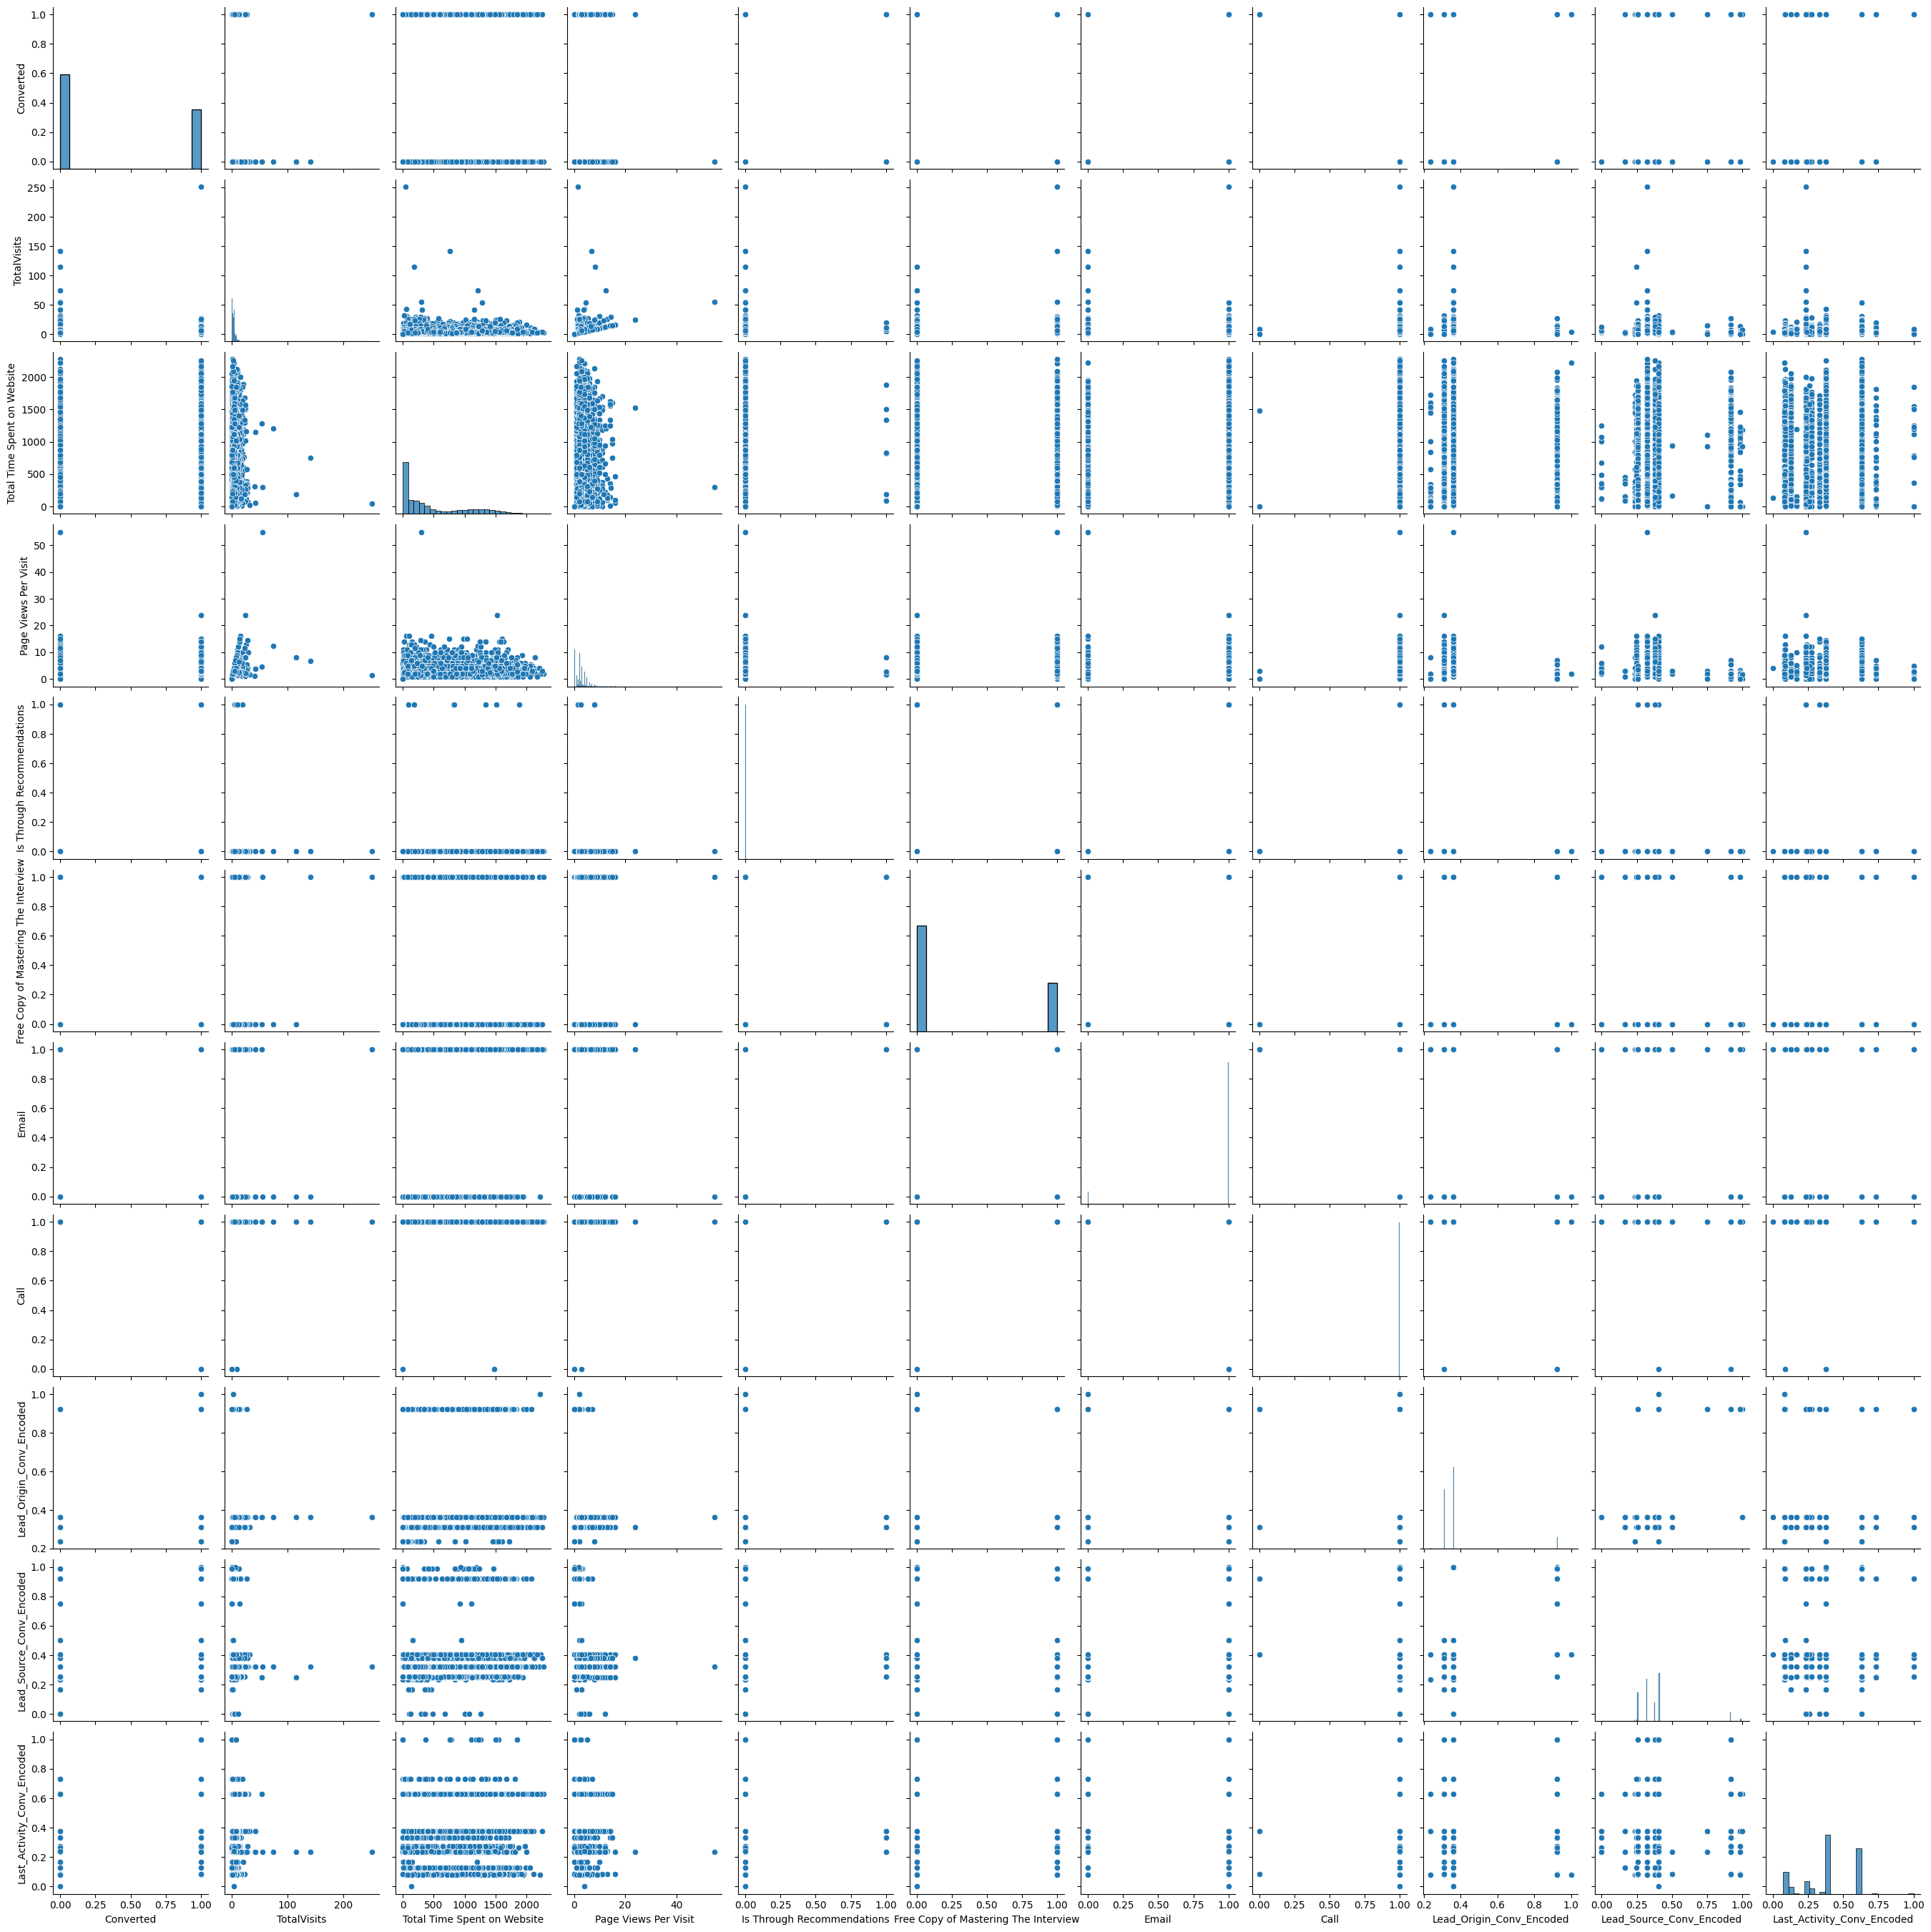

In [72]:
## Let us see if there collinearity between the variables.
sns.pairplot(df_dropped_sixth)

In [73]:
## Insight : There seem to be little linear relation between "Page Views Per Visit" and "TotalVisits". But it does not seem significant enough to act on.

In [ ]:
## Let us build the model now.
## Build Model
## 1. Split data into Training (80%) and Testing (20%) sets.
## 2. Fit the model on the training set.
## 3. Predict outcomes on the testing set.
## 4. Compare predictions vs. actual values.

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [75]:
# 1. Prepare Data
X = df_dropped_sixth.drop('Converted', axis=1)
y = df_dropped_sixth['Converted']

# 2. Split Data (80% Train, 20% Test)
# random_state ensures you get the same split every time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Build & Train Model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Check Accuracy & Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nDetailed Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.79

Confusion Matrix:
[[972 135]
 [259 482]]

Detailed Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1107
           1       0.78      0.65      0.71       741

    accuracy                           0.79      1848
   macro avg       0.79      0.76      0.77      1848
weighted avg       0.79      0.79      0.78      1848



In [76]:
## Analysis of Model parameters
## High Precision - The above model holds good in predicting which lead will convert or not.
## Low Recall - Actual leads which got converted, model could predict  only 65% of them.
## Could we improve on recall? 

In [77]:
## Let us experiment with cut-off value.
from sklearn.metrics import roc_curve

Optimal Threshold: 0.3748


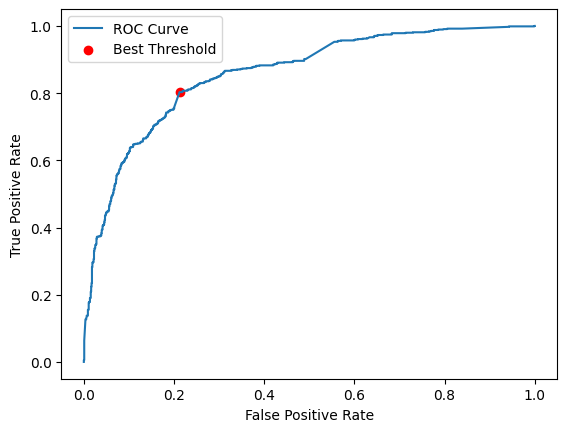

In [78]:
# 1. Get predicted probabilities instead of hard classes (0/1)
# model.predict_proba returns [prob_of_0, prob_of_1]
y_probs = model.predict_proba(X_test)[:, 1]

# 2. Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 3. Find the optimal threshold using Youden's J Statistic
# J = TPR – FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# 4. Plot the Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label='Best Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [79]:
## Let us calculate the area under the curve
from sklearn.metrics import roc_auc_score

In [80]:
## We have already got the probabilities for y
# 1. Get the probabilities for the positive class (Class 1)
# Use [:, 1] to get the second column (probability of enrollment)
## y_probs = model.predict_proba(X_test)[:, 1]

# 2. Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)

print(f"The Area Under the Curve (AUC) is: {auc_score:.4f}")

The Area Under the Curve (AUC) is: 0.8576


In [81]:
## We have a good AUC value, so model seems to be good.

In [82]:
## Let us build a model using Stats Model
import statsmodels.api as sm  # Importing the statsmodels library

In [84]:
## We already have the train-test split data.
# Add a constant term to the feature matrix for the intercept
X_train_sm = sm.add_constant(X_train)


In [85]:
## The stats model fit function report 'Singular Matrix' error. Possibly, there are correlated variables or redundant variables.
## Let us use VIF to find them.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
# X is our dataframe of independent variables
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                                feature        VIF
7              Lead_Origin_Conv_Encoded  53.945585
8              Lead_Source_Conv_Encoded  50.153179
6                                  Call  22.401970
5                                 Email  13.107968
9            Last_Activity_Conv_Encoded   5.705602
2                  Page Views Per Visit   3.560543
1           Total Time Spent on Website   2.121588
0                           TotalVisits   2.073262
4  Free Copy of Mastering The Interview   1.788149
3            Is Through Recommendations   1.002817


In [ ]:
## Interesting Insights: 'Lead_Origin_Conv_Encoded' and 'Lead_Source_Conv_Encoded' show high VIF.
## Also, 'Call' and 'Email' seem to be high VIF.
## Let us try fitting a model by removing variable with high VIF one by one.

In [87]:
## Remove 'Lead_Origin_Conv_Encoded'
df_dropped_seventh = df_dropped_sixth.drop('Lead_Origin_Conv_Encoded', axis=1)

In [89]:
## Let us calculate VIF again
X_vif1 = df_dropped_seventh.drop('Converted', axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif1.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif1.values, i) for i in range(len(X_vif1.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                                feature        VIF
6                                  Call  20.842573
5                                 Email  13.029209
7              Lead_Source_Conv_Encoded   7.007612
8            Last_Activity_Conv_Encoded   5.689061
2                  Page Views Per Visit   3.343344
0                           TotalVisits   2.070102
1           Total Time Spent on Website   2.053618
4  Free Copy of Mastering The Interview   1.649620
3            Is Through Recommendations   1.002536


In [90]:
## Let us remove the 'Call' and retry the VIF
df_dropped_eighth = df_dropped_seventh.drop('Call', axis=1)

In [91]:
## Let us calculate VIF again
X_vif2 = df_dropped_eighth.drop('Converted', axis=1)

vif_data = pd.DataFrame()
vif_data["feature"] = X_vif2.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif2.values, i) for i in range(len(X_vif2.columns))]

print(vif_data.sort_values(by="VIF", ascending=False))

                                feature       VIF
5                                 Email  6.643430
7            Last_Activity_Conv_Encoded  5.546006
6              Lead_Source_Conv_Encoded  5.374501
2                  Page Views Per Visit  3.264024
0                           TotalVisits  2.064828
1           Total Time Spent on Website  2.051794
4  Free Copy of Mastering The Interview  1.595388
3            Is Through Recommendations  1.002524


In [92]:
## This seems to be a good VIF table indicating very less collinearlity

In [93]:
## Let us build the stats model again
# 1. Prepare Data
X_sm = df_dropped_eighth.drop('Converted', axis=1)
y_sm = df_dropped_eighth['Converted']

# 2. Split Data (80% Train, 20% Test)
# random_state ensures you get the same split every time you run the code
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [94]:
# 3. Add a constant term to the feature matrix for the intercept
X_train_sm_cnst = sm.add_constant(X_train_sm)

# 4. Fit the logistic regression model using statsmodels
sm_model = sm.Logit(y_train_sm, X_train_sm_cnst).fit()

Optimization terminated successfully.
         Current function value: 0.467193
         Iterations 6


In [ ]:
## Now the stats model is built correctly

In [95]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:              Converted   No. Observations:                 7392
Model:                          Logit   Df Residuals:                     7383
Method:                           MLE   Df Model:                            8
Date:                Fri, 26 Dec 2025   Pseudo R-squ.:                  0.2972
Time:                        13:23:24   Log-Likelihood:                -3453.5
converged:                       True   LL-Null:                       -4914.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -5.4542      0.189    -28.892      0.000      -5.824      -5.084
TotalVisits                              0.0289      

In [97]:
# 5. Add a constant term to the feature matrix for the intercept in the testing data
X_test_sm_cnst = sm.add_constant(X_test_sm)

# 6. Make predictions using the trained statsmodels logistic regression model
y_pred_sm = sm_model.predict(X_test_sm_cnst)

In [98]:
y_pred_sm

4608    0.261258
7935    0.066669
4043    0.021069
7821    0.251651
856     0.247827
          ...   
7387    0.626804
3063    0.640865
603     0.138444
4210    0.283698
7352    0.311063
Length: 1848, dtype: float64

In [99]:
# 7. Convert predicted probabilities to binary predictions using a threshold of 0.5
y_pred_sm_conv = np.where(y_pred_sm > 0.5, 1, 0)

In [100]:
# 8. Check Accuracy & Metrics
accuracy_sm = accuracy_score(y_test_sm, y_pred_sm_conv)
conf_matrix_sm = confusion_matrix(y_test_sm, y_pred_sm_conv)

print(f"Accuracy: {accuracy_sm:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_sm)
print("\nDetailed Report:")
print(classification_report(y_test_sm, y_pred_sm_conv))

Accuracy: 0.78

Confusion Matrix:
[[965 142]
 [256 485]]

Detailed Report:
              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1107
           1       0.77      0.65      0.71       741

    accuracy                           0.78      1848
   macro avg       0.78      0.76      0.77      1848
weighted avg       0.78      0.78      0.78      1848



In [101]:
## Performance of statsmodel and sklearn model are quite the same.

In [ ]:
## Let us try with diferent cut-off value

In [102]:
y_pred_sm_conv_pt37 = np.where(y_pred_sm > 0.37, 1, 0)

In [103]:
# 8. Check Accuracy & Metrics
accuracy_sm_pt37 = accuracy_score(y_test_sm, y_pred_sm_conv_pt37)
conf_matrix_sm_pt37 = confusion_matrix(y_test_sm, y_pred_sm_conv_pt37)

print(f"Accuracy: {accuracy_sm_pt37:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_sm_pt37)
print("\nDetailed Report:")
print(classification_report(y_test_sm, y_pred_sm_conv_pt37))

Accuracy: 0.78

Confusion Matrix:
[[852 255]
 [149 592]]

Detailed Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1107
           1       0.70      0.80      0.75       741

    accuracy                           0.78      1848
   macro avg       0.78      0.78      0.78      1848
weighted avg       0.79      0.78      0.78      1848



In [104]:
## We have improved the recall score to predict 80% of actual conversions.